In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df_property = pd.read_csv ("Property Sales of Melbourne City.csv")

In [3]:
df = df_property.describe
print(df)

<bound method NDFrame.describe of        Unnamed: 0        Suburb           Address  Rooms Type    Price Method  \
0               1    Abbotsford      85 Turner St      2    h  1480000      S   
1               2    Abbotsford   25 Bloomburg St      2    h  1035000      S   
2               4    Abbotsford      5 Charles St      3    h  1465000     SP   
3               5    Abbotsford  40 Federation La      3    h   850000     PI   
4               6    Abbotsford       55a Park St      4    h  1600000     VB   
...           ...           ...               ...    ...  ...      ...    ...   
18391       23540  Williamstown   8/2 Thompson St      2    t   622500     SP   
18392       23541  Williamstown      96 Verdon St      4    h  2500000     PI   
18393       23544     Yallambie      17 Amaroo Wy      4    h  1100000      S   
18394       23545    Yarraville        6 Agnes St      4    h  1285000     SP   
18395       23546    Yarraville     33 Freeman St      4    h  1050000     

In [4]:
#DataFrame with null 
df_property.isnull().sum()

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

### Removing null values of postcode

In [5]:
df_property.isnull().sum()

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

In [22]:

mean_building_area = df_property["BuildingArea"].mean()
df_property.loc[df_property["BuildingArea"].isna(),"BuildingArea"]=mean_building_area

df_property

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,151.220219,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.000000,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.000000,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,151.220219,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.000000,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,23540,Williamstown,8/2 Thompson St,2,t,622500,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.000000,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.000000,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,151.220219,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.000000,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


### Calculating the mean value of bulding area


In [25]:
# calculate the IQR for the 'y' column
Q1 = df_property['BuildingArea'].quantile(0.25)
Q3 = df_property['BuildingArea'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers in the 'y' column
outliers = df_property[(df_property['BuildingArea'] < Q1 - 1.5*IQR) | (df_property['BuildingArea'] > Q3 + 1.5*IQR)]

print(outliers.index)
df_property=df_property.loc[df_property.index.difference(outliers.index)]

Int64Index([   91,   287,   346,   371,   393,   486,   490,   502,   519,
              526,
            ...
            18074, 18085, 18130, 18159, 18164, 18206, 18223, 18251, 18257,
            18355],
           dtype='int64', length=384)


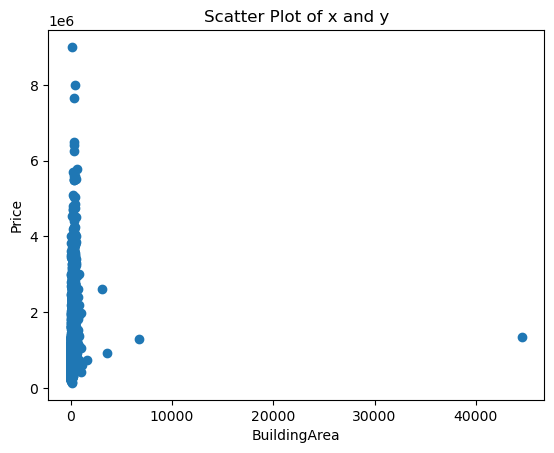

In [8]:
plt.scatter( df_property['BuildingArea'],df_property['Price'])

# set axis labels and title
plt.xlabel('BuildingArea')
plt.ylabel('Price')
plt.title('Scatter Plot of x and y')

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress( df_property['BuildingArea'],df_property['Price'])
# y = mx + b
regress_values = df_property['BuildingArea'] * slope + intercept
plt.plot(df_property['BuildingArea'],regress_values, color='r', alpha=0.7)
# display the plot
plt.show()
# To close pyplot
plt.close()

In [17]:
(slope, intercept, rvalue, pvalue, stderr)

(3744.921977867503,
 490152.7597672065,
 0.03554369702219968,
 6.863703086108001e-05,
 940.3918474110031)